# Task-2 Prediction Using Supervised Machine Learning
Description: Predict the percentage of student based on the no. of study hours with the help of Linear Regression Method

# By: Kiran Jangir (Data Science and Business Analyst Intern at TSF)

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step-1 Importing and Understanding the Data

In [2]:
#importing the data from URL
url='http://bit.ly/w-data'
studentdata = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [3]:
studentdata.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
studentdata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
studentdata.shape

(25, 2)

# Step-2 EDA to find relation between the data points
plotting the some graphs to ubderstand the data

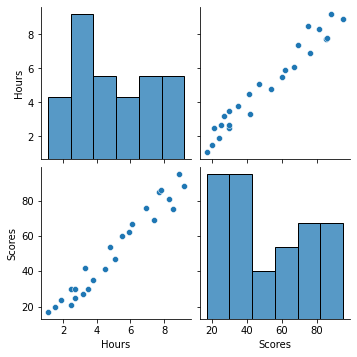

In [6]:
sns.pairplot(studentdata)

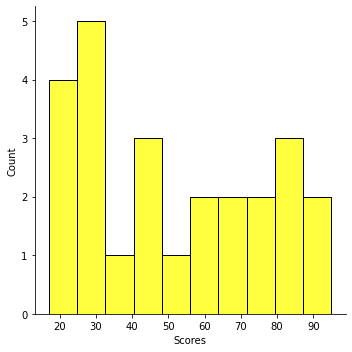

In [17]:
sns.displot(x='Scores',data=studentdata,bins=10 , color='yellow')

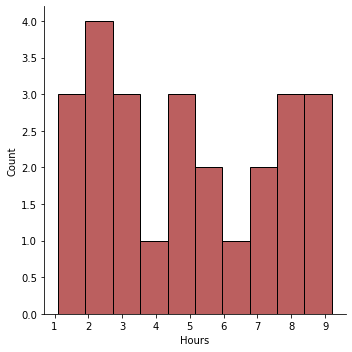

In [18]:
sns.displot(x='Hours',data=studentdata,bins=10,color='brown')

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

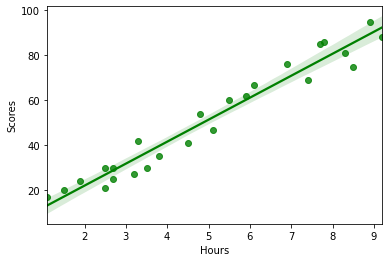

In [23]:
sns.regplot(x='Hours',y='Scores',data=studentdata,color='green')

This plot shows the positive relationship between no. of study hours and scores obtained 

## Checking for correlation between studied hours and score obtained

In [27]:
sample=studentdata.corr() #this shows the correlation between the hours and score using correlation coefficient
print(sample)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


<AxesSubplot:>

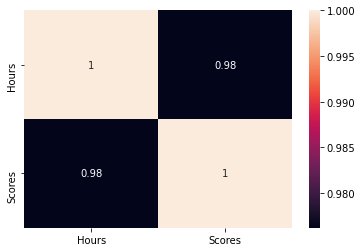

In [28]:
sns.heatmap(sample,annot=True)

# Step-3 Preparing the Data for the Regression model
Training regression model, for this we will need to first split our data into an array of features which will be our x and an array of dependent variable which will be y. In this data dependent variable will be Scores and Features will be Hours.

In [32]:
x = studentdata.iloc[:,:-1].values # converting into arrays
y= studentdata.iloc[:,-1].values
print('x = ',x)
print('y = ',y)

x =  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y =  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Train Test Split

now lets split the data into training set and testing set we will train our model on training set then use the test set to evaluate the model.

In [33]:
from sklearn.model_selection import train_test_split  #importing train test split from the sklearn library which is mainly used in machine learning
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=50)

## Creating and Training the Model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

Now evaluate the model by finding out the coefficients and how we can interpret them.

In [37]:
# printing the intercepts
print(lm.intercept_)

3.0397190483256935


In [39]:
lm.coef_

array([9.62160558])

# Step-4 Prediction from the model

In [40]:
predictions = lm.predict(x_test)

In [41]:
predictions

array([88.67200871, 29.01805411, 69.42879755, 39.60182025, 13.62348519,
       46.33694416, 82.89904536])

In [45]:
comparing_predictions = pd.DataFrame({'Actual' : y_test , 'Predicted' : predictions} )
comparing_predictions

,Actual,Predicted
0,95,88.672009
1,30,29.018054
2,76,69.428798
3,35,39.601820
4,17,13.623485
5,41,46.336944
6,81,82.899045


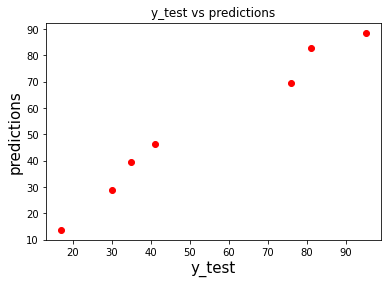

In [47]:
plt.scatter(y_test,predictions,color='red')
plt.title('y_test vs predictions')
plt.xlabel('y_test',fontsize=15)
plt.ylabel('predictions',fontsize=15)
plt.show()

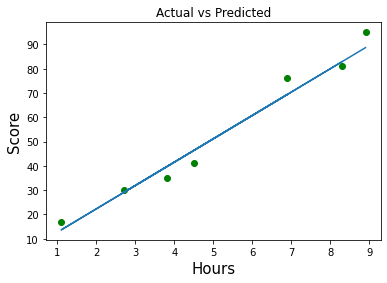

In [49]:
line = lm.coef_*x_test+lm.intercept_
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,line)
plt.title('Actual vs Predicted')
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Score',fontsize=15)
plt.show()

### Residual Histogram

<AxesSubplot:ylabel='Count'>

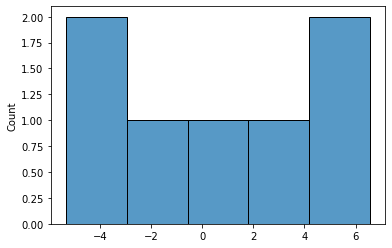

In [57]:
sns.histplot((y_test-predictions),bins=5)

# Score prediction for study hour = 9.25

In [54]:
prediction = lm.predict([[9.25]])

In [55]:
prediction

array([92.03957066])

# So if a student studied for 9.25 hours he/she will get 92.04 % marks in the examination 

In [ ]:
# score prediction for 10 hours

In [56]:
prediction = lm.predict([[10]])
prediction

array([99.25577484])

# Thank you!!